In [ ]:
import gdown
google_drive_link = f'https://drive.google.com/uc?id=17X9EyOxN_ZyO4Szmt-Cl_vxTybAwzGZl'

# Specify the output file name
output_file = 'images_dataset.zip'

# Download the file
gdown.download(google_drive_link, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17X9EyOxN_ZyO4Szmt-Cl_vxTybAwzGZl
To: /content/images_dataset.zip
100%|██████████| 11.1M/11.1M [00:00<00:00, 25.5MB/s]


'images_dataset.zip'

In [ ]:
#Unzip file
import zipfile

def unzip_file(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

zip_file_path = '/content/images_dataset.zip'
extracted_folder_path = '/content'

unzip_file(zip_file_path, extracted_folder_path)

#delete filename desktop.ini
import os
os.remove('/content/music_notes_dataset/desktop.ini')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from tensorflow.keras.models import Model # basic class for specifying and training a neural network
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 #pip3 install opencv-python
import urllib
import urllib
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from google.colab.patches import cv2_imshow

In [ ]:
#convert images to matrix
from PIL import Image

def image_to_matrix(image_name):
  all_matrices = []

  for file_name in image_name.to_list():
      # Create the full path to the image file
      image_path = f'/content/music_notes_dataset/{file_name}'

      # Open the grayscale image
      image = Image.open(image_path)

      # Convert the image to a NumPy array
      image_matrix = np.array(image)

      # Append the matrix to the list
      all_matrices.append(image_matrix)

  # Convert the list of matrices to a NumPy array
  diabetic_retinopathy_data = np.array(all_matrices)
  return diabetic_retinopathy_data


In [ ]:
data = pd.read_csv("/content/labeled_music_notes.csv")
data = data.drop('Unnamed: 0', axis=1)

print(data)

      image_name  target
0      img_0.jpg       0
1      img_1.jpg       0
2      img_2.jpg       0
3      img_3.jpg       0
4      img_4.jpg       0
..           ...     ...
980  img_980.jpg       7
981  img_981.jpg       7
982  img_982.jpg       7
983  img_983.jpg       7
984  img_984.jpg       7

[985 rows x 2 columns]


In [ ]:
class_names = ['Do', 'Re', 'Mi', 'Fa', 'Sol', 'La', 'Ti', 'Imposter']
num_classes = len(class_names)


batch_size = 128
num_epochs = 32


In [ ]:
#split data
from sklearn.model_selection import train_test_split

X = data['image_name']
Y = data['target']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, Y, test_size=0.2, random_state=1908)
print(X_train_raw)
X_train = image_to_matrix(X_train_raw)
print(X_train.shape)
X_test = image_to_matrix(X_test_raw)
y_train = y_train_raw.to_numpy()
y_test = y_test_raw.to_numpy()
print(y_train[2])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = tf.keras.utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = tf.keras.utils.to_categorical(y_test, num_classes) # One-hot encode the labels
class_names[np.argmax (Y_train[2])]

141    img_141.jpg
225    img_225.jpg
220    img_220.jpg
689    img_689.jpg
409    img_409.jpg
          ...     
731    img_731.jpg
950    img_950.jpg
151    img_151.jpg
739    img_739.jpg
86      img_86.jpg
Name: image_name, Length: 788, dtype: object
(788, 256, 256, 3)
1


'Re'

# **Using transfered Knowledge (Pretrained model)**

In [ ]:
from keras.applications import VGG19
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=(256,256,3))
vgg_layer_list = vgg.layers


model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False


model.add(Flatten())

# Fully connected layer. 1 hidden layer consisting of 512 nodes
model.add(Dense(64, name='Dense1'))
model.add(Activation('tanh'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', name='Dense2'))
print(model.summary())

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer=keras.optimizers.Adam(learning_rate=0.001), # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0         
                                                         

In [ ]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

Epoch 1/32
6/6 [==============================] - 63s 7s/step - loss: 1.5353 - accuracy: 0.4725 - val_loss: 0.5836 - val_accuracy: 0.8987
Epoch 2/32
6/6 [==============================] - 5s 813ms/step - loss: 0.7180 - accuracy: 0.7828 - val_loss: 0.3268 - val_accuracy: 0.9241
Epoch 3/32
6/6 [==============================] - 5s 833ms/step - loss: 0.4604 - accuracy: 0.8858 - val_loss: 0.2181 - val_accuracy: 0.9873
Epoch 4/32
6/6 [==============================] - 5s 869ms/step - loss: 0.3416 - accuracy: 0.9238 - val_loss: 0.1750 - val_accuracy: 1.0000
Epoch 5/32
6/6 [==============================] - 5s 827ms/step - loss: 0.2778 - accuracy: 0.9450 - val_loss: 0.1684 - val_accuracy: 0.9747
Epoch 6/32
6/6 [==============================] - 5s 845ms/step - loss: 0.2395 - accuracy: 0.9563 - val_loss: 0.1612 - val_accuracy: 0.9620
Epoch 7/32
6/6 [==============================] - 5s 841ms/step - loss: 0.1947 - accuracy: 0.9732 - val_loss: 0.1398 - val_accuracy: 0.9747
Epoch 8/32
6/6 [======

In [ ]:
#save our model

model.save("models.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!
print(Y_test.shape)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

7/7 [==============================] - 10s 469ms/step - loss: 0.0308 - accuracy: 0.9949
(197, 8)
Test loss: 0.030822306871414185
Test accuracy: 99.49238300323486


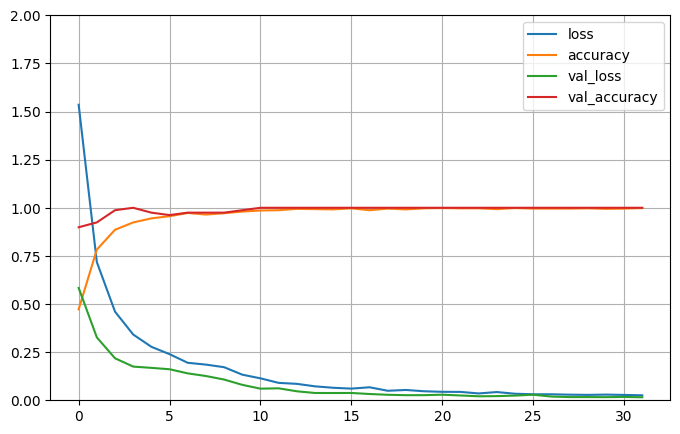

In [ ]:
err_hist = history.history
pd.DataFrame(err_hist).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

7/7 [==============================] - 1s 180ms/step
[[23  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0]
 [ 0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  1  0  0  0  0 23]]
              precision    recall  f1-score   support

          Do       1.00      1.00      1.00        23
          Re       1.00      1.00      1.00        22
          Mi       0.96      1.00      0.98        26
          Fa       1.00      1.00      1.00        21
         Sol       1.00      1.00      1.00        33
          La       1.00      1.00      1.00        24
          Ti       1.00      1.00      1.00        24
    Imposter       1.00      0.96      0.98        24

    accuracy                           0.99       197
   macro avg       1.00      0.99      0.99       197
weighted avg       1.00      0.99      0.99       197



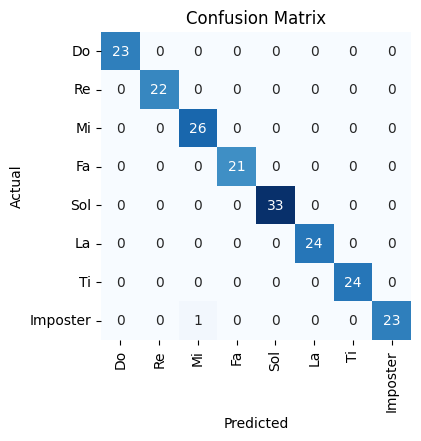

In [ ]:
predictions = model.predict(X_test)

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes))
print(cm)
clr = classification_report(np.argmax(Y_test, axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes), target_names=class_names)
print(clr)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(8) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(8) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix55.png')
plt.show()
